# Prim's Algorithm - Custom vs Library Implementation

This project demonstrates **Prim's Minimum Spanning Tree (MST) algorithm** using:

- A **custom implementation** from scratch using basic data structures
- A **library implementation** using Python’s `networkx`

The algorithm is applied to a **randomly generated weighted undirected graph** with at least 20 nodes and random edge weights.

---

## 📁 Files

### `prim_basic.py`
- Implements Prim’s algorithm using:
  - `dict` for graph representation
  - `heapq` for priority queue
  - No external libraries
- Outputs:
  - All edges in the generated graph
  - All MST edges
  - Total weight of the MST

### `prim_library.py`
- Uses `networkx` to:
  - Generate the same type of graph
  - Run the built-in `minimum_spanning_tree()` function (with Prim's algorithm)
  - Visualize the graph and its MST using `matplotlib`
- Outputs:
  - All edges in the generated graph
  - All MST edges
  - Total weight of the MST
  - Optional graph visualization




In [1]:
## No Graph Library

import heapq

## defining the graphs vertices and edges
graph = {
    'S': {'A': 12, 'B': 8},
    'A': {'S': 12, 'B': 9, 'C': 22, 'E': 11},
    'B': {'S': 8, 'A': 9, 'E': 14},
    'C': {'A': 22, 'E': 16, 'D': 15},
    'D': {'C': 15, 'E': 3},
    'E': {'A': 11, 'B': 14, 'C': 16, 'D': 3}
}

# initializing prim's algorithm
def prim(graph, start):
    visited = set() # empty set for visited nodes
    min_heap = [(0, start, None)]  # (weight, node, from)
    mst = [] # start with empty list for our final mst
    total_weight = 0 # total weight of the mst

    while min_heap:
        weight, node, prev = heapq.heappop(min_heap) # get the edge with the smallest weight
        if node not in visited:
            visited.add(node) # mark current node as visited after visiting
            if prev:
                mst.append((prev, node, weight)) # don't have to add edge when adding first node
                total_weight += weight # add the weight to the total
            for neighbor, w in graph[node].items(): # push all adjacent unvisited nodes into the heap
                if neighbor not in visited:
                    heapq.heappush(min_heap, (w, neighbor, node))

    return mst, total_weight

# run prim's algorithm starting at node "S"
mst_edges, total = prim(graph, 'S')

# print results
print("Minimum Spanning Tree:")
for u, v, w in mst_edges:
    print(f"{u} -- {v} [weight: {w}]")
print(f"Total Weight: {total}")


Minimum Spanning Tree:
S -- B [weight: 8]
B -- A [weight: 9]
A -- E [weight: 11]
E -- D [weight: 3]
D -- C [weight: 15]
Total Weight: 46


Minimum Spanning Tree:
S -- B [weight: 8]
A -- B [weight: 9]
A -- E [weight: 11]
C -- D [weight: 15]
E -- D [weight: 3]
Total Weight: 46


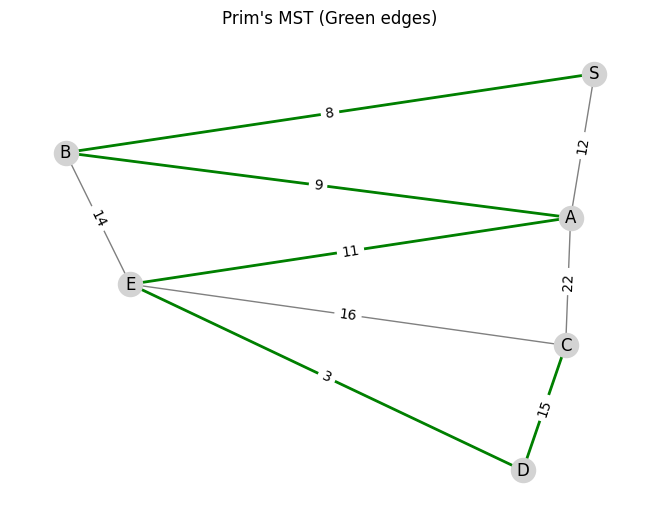

In [2]:
## Graph Library Used -- networkx

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

edges = [
    ('S', 'A', 12), ('S', 'B', 8),
    ('A', 'B', 9), ('A', 'C', 22), ('A', 'E', 11),
    ('B', 'E', 14), ('C', 'E', 16), ('C', 'D', 15),
    ('E', 'D', 3)
]

G.add_weighted_edges_from(edges)

# Prim's algorithm via networkx
mst = nx.minimum_spanning_tree(G, algorithm='prim')

# Print MST
print("Minimum Spanning Tree:")
total_weight = 0
for u, v, data in mst.edges(data=True):
    print(f"{u} -- {v} [weight: {data['weight']}]")
    total_weight += data['weight']
print(f"Total Weight: {total_weight}")

# Draw Graph with MST highlighted
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray')
nx.draw_networkx_edges(mst, pos, edge_color='green', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Prim's MST (Green edges)")
plt.show()


Minimum Spanning Tree Edges:
A -- S [weight: 6]
B -- S [weight: 17]
C -- L [weight: 3]
C -- N [weight: 5]
C -- T [weight: 6]
D -- G [weight: 7]
E -- M [weight: 6]
E -- H [weight: 1]
E -- Q [weight: 3]
F -- G [weight: 7]
G -- S [weight: 5]
I -- J [weight: 15]
J -- Q [weight: 4]
J -- O [weight: 7]
K -- M [weight: 6]
L -- P [weight: 5]
M -- N [weight: 5]
O -- S [weight: 2]
R -- T [weight: 14]

Total MST Weight: 124


<ipython-input-3-407eff597f32>:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


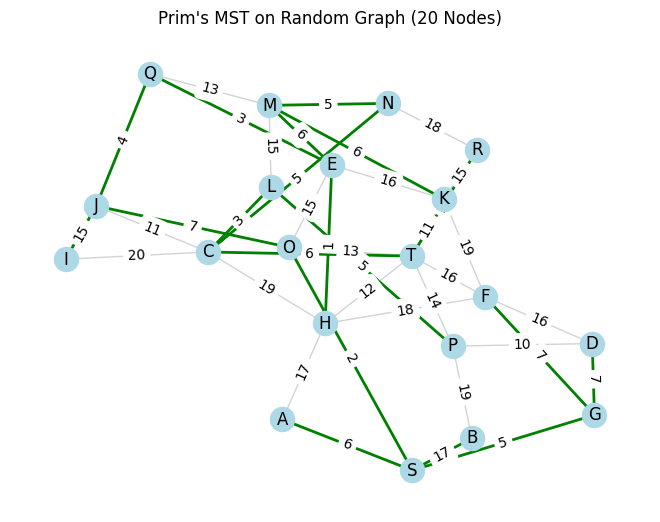

In [3]:
# Using Graph Library to Create a Graph of Non-trivial example

import networkx as nx  # graph library
import matplotlib.pyplot as plt  # graph visualization
import random  # generating random nodes and edge weights
import string  # generating random node names

# Step 1: Generate 20 unique node labels (e.g., A, B, C... T)
nodes = [chr(65 + i) for i in range(20)]  # nodes labeled 'A' to 'T'

# Step 2: Initialize an undirected graph
G = nx.Graph()
G.add_nodes_from(nodes)  # add all 20 nodes to the graph

# Step 3: Randomly connect nodes with random weights
# start with a tree, then add more edges
edges = set()
connected = set()
remaining = set(nodes)

# Start with a random node and build a spanning tree
current = remaining.pop()
connected.add(current)

# Step 4: Create a connected base (spanning tree)
while remaining:
    neighbor = random.choice(list(remaining))
    weight = random.randint(1, 20)
    edges.add((current, neighbor, weight))
    connected.add(neighbor)
    remaining.remove(neighbor)
    current = neighbor  # Move to the newly connected node

# Step 5: Add some extra random edges to make graph non-trivial
while len(edges) < 40:  # Add extra edges up to around 40 total
    u, v = random.sample(nodes, 2)
    if u != v:
        weight = random.randint(1, 20)
        edge = (u, v, weight)
        rev_edge = (v, u, weight)
        if edge not in edges and rev_edge not in edges:
            edges.add(edge)

# Step 6: Add edges to the graph
G.add_weighted_edges_from(edges)

# Step 7: Run Prim's algorithm using NetworkX
mst = nx.minimum_spanning_tree(G, algorithm='prim')

# Step 8: Print MST edges and total weight
print("Minimum Spanning Tree Edges:")
total_weight = 0
for u, v, data in mst.edges(data=True):
    print(f"{u} -- {v} [weight: {data['weight']}]")
    total_weight += data['weight']
print(f"\nTotal MST Weight: {total_weight}")

# Step 9: Visualize the graph and MST
pos = nx.spring_layout(G, seed=42)  # use seed for consistent layout

# Draw full graph in light gray
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='lightgray')
# Draw MST edges in green
nx.draw_networkx_edges(mst, pos, edge_color='green', width=2)
# Draw edge weights on original graph
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.title("Prim's MST on Random Graph (20 Nodes)")
plt.tight_layout()
plt.show()
